In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('Advertising.csv', index_col=0)

In [2]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


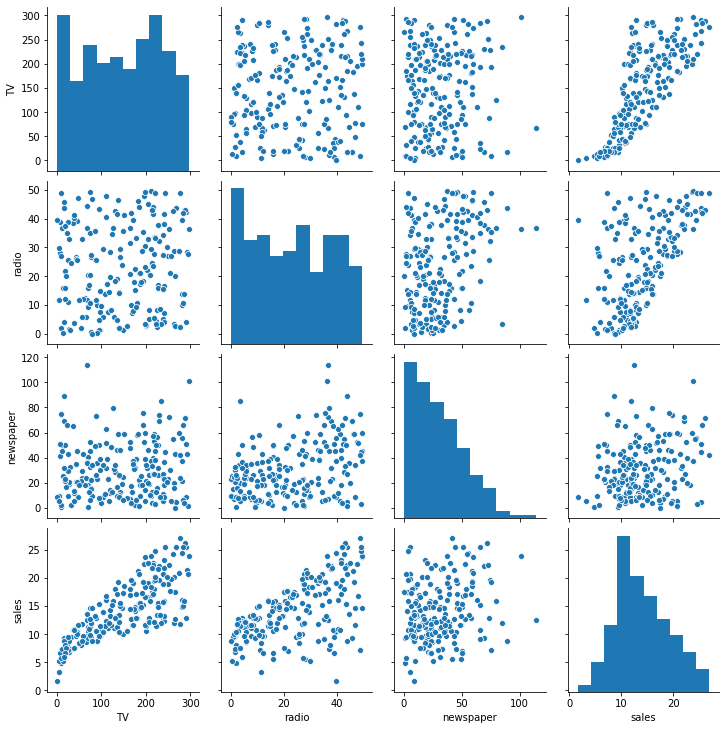

In [4]:
sns.pairplot(df)

D) The Sales and TV chart show an exponential growth, sales and radio also show an increase but also has a bigger spread or outliars of sort, sales and newspaper is mostly clumped together and only shows a little bit of growth. Depending on what axis the catagory is on, this changes how the chart shows data.

E) The best form of advertising seems to be TV as the chart shows the amount of sales increasing depending the amount of TV advertising bought.

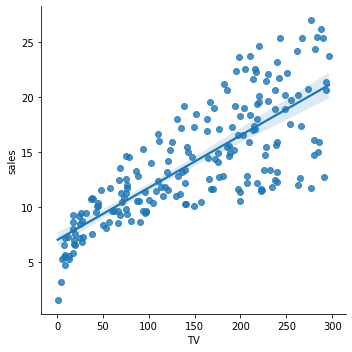

In [5]:
TVData = sns.lmplot(x='TV', y='sales', data=df)

In [6]:
#I got the code from https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
TVdf = df['TV'].to_numpy()
Sdf = df['sales'].to_numpy()
print(TVdf,Sdf)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [7]:
TV=TVdf.reshape(-1, 1)
Sales=Sdf.reshape(-1, 1)

In [8]:
# Create the regression model
model1 = LinearRegression()
# fit our known data pairs (weigth and heights) to the model
# fit our known data pairs (weigth and heights) to the model
model1.fit(X=TV, y=Sales) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Calculate the y-intecept
yIntercept = round(model1.intercept_[0],2)
#calcualte the slope of the line
Xcoefficient =round(model1.coef_[0][0],2)

#Print these
print("Y-Intercept is",yIntercept ,)   # -104.75
print("X-Coefficient is:",Xcoefficient )    # 103.31

#do a tidy up if you want to print up the equation of the line of best fit
if yIntercept < 0:
    print("Therefore the equation of the line is: y = ", Xcoefficient, "x +",yIntercept, sep="" )
else:
    print("Therefore the equation of the line is: y = ", Xcoefficient, "x + ",yIntercept, sep="" )

Y-Intercept is 7.03
X-Coefficient is: 0.05
Therefore the equation of the line is: y = 0.05x + 7.03


In [10]:
new_R2= model1.score(TV,Sales)
print("The new r^2 coefficient is: %.3f"%new_R2)

The new r^2 coefficient is: 0.612


The new r^2 coefficient is: 0.612
Therefore the equation of the line is: y = 0.05x + 7.03


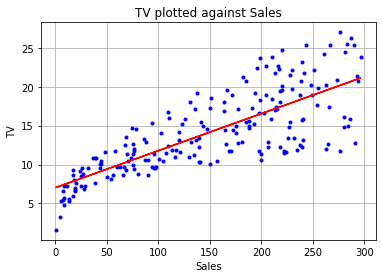

In [11]:
# set the chart properties
plt.title('TV plotted against Sales')
plt.xlabel('Sales')
plt.ylabel('TV')
 
plt.plot(TV, Sales, 'b.') #colour dots will be black

# sets the axes  ranges
plt.axis()
plt.grid(True)

# this plots the regression line
plt.plot(TV, model1.predict(TV), color='r')
print("The new r^2 coefficient is: %.3f"%new_R2)

if yIntercept < 0:
    print("Therefore the equation of the line is: y = ", Xcoefficient, "x +",yIntercept, sep="" )
else:
    print("Therefore the equation of the line is: y = ", Xcoefficient, "x + ",yIntercept, sep="" )

The line shows the increase of sales depending on how much is spent on TV advertising, what we can gather from this chart is that the more money that is spent on TV advertising the more sales are being made

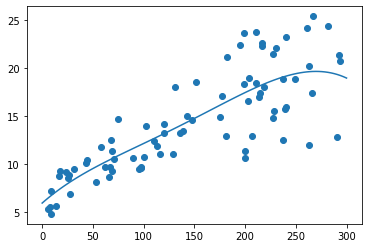

The new r^2 coefficient is: 0.657


In [17]:
train_x = TVdf[:80]
train_y = Sdf[:80]

test_x = TVdf[80:]
test_y = Sdf[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 300, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

reTrain_X = train_x.reshape(-1, 1)
reTrain_Y = train_y.reshape(-1, 1)
new_R2= model1.score(reTrain_X,reTrain_Y)
print("The new r^2 coefficient is: %.3f"%new_R2)

this is Data is a little less dense and shows a lot more of a spread near the end showing thatb the data is slowly becoming more chaotic. the coefficent is bigger than the origianal

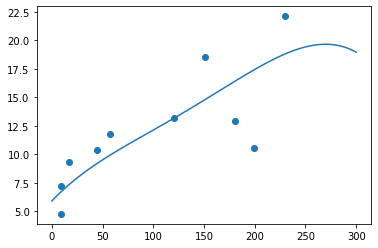

The new r^2 coefficient is: 0.602


In [19]:
train_x1 = TVdf[:10]
train_y1 = Sdf[:10]

test_x1 = TVdf[10:]
test_y1 = Sdf[10:]

mymodel1 = np.poly1d(np.polyfit(train_x1, train_y1, 4))

myline1 = np.linspace(0, 300, 100)

plt.scatter(train_x1, train_y1)
plt.plot(myline, mymodel(myline))
plt.show()

reTrain_X1 = train_x1.reshape(-1, 1)
reTrain_Y1 = train_y1.reshape(-1, 1)
new_R2= model1.score(reTrain_X1,reTrain_Y1)
print("The new r^2 coefficient is: %.3f"%new_R2)

This data is very sparse and allows us to see that the data is very spread out and the line shows that the data is very slowly dipping down. the coefficent is lower then the origanl 

In [20]:
x =train_x
y = train_y

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predict = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     152.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.00e-20
Time:                        08:01:46   Log-Likelihood:                -203.17
No. Observations:                  80   AIC:                             410.3
Df Residuals:                      78   BIC:                             415.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0219      0.685     10.255      0.0

In [21]:
x1 =train_x1
y1 = train_y1

X1 = sm.add_constant(x1)

model1 = sm.OLS(y1,x1).fit()
predict1 = model1.predict(x1)

print_model1 = model1.summary()
print(print_model1)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              41.90
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                    0.000115
Time:                        08:01:48   Log-Likelihood:                         -31.183
No. Observations:                  10   AIC:                                      64.37
Df Residuals:                       9   BIC:                                      64.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\aiden\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [22]:
Advertising_Spend = [223,220,15,45,76,11,32,0]
Actual_Sales = [18.5,25.5,5.5,9.4,14.1,5.8,10.3,6.1]

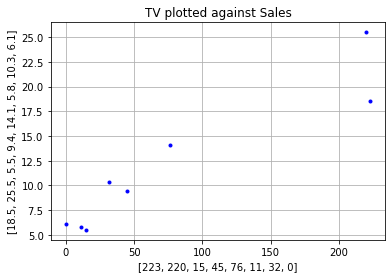

In [23]:
# set the chart properties
plt.title('TV plotted against Sales')
plt.xlabel(Advertising_Spend)
plt.ylabel(Actual_Sales)
 
plt.plot(Advertising_Spend, Actual_Sales, 'b.') #colour dots will be black

# sets the axes  ranges
plt.axis()
plt.grid(True)

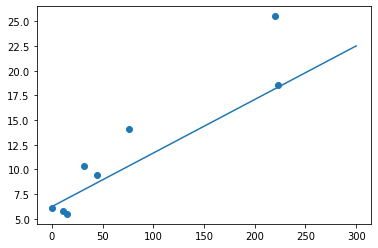

In [24]:
mymodelAD = np.poly1d(np.polyfit(Advertising_Spend, Actual_Sales, 1))

mylineAD = np.linspace(0, 223, 100)

plt.scatter(Advertising_Spend, Actual_Sales)
plt.plot(myline, mymodelAD(mylineAD))
plt.show()

In [25]:
ADX1 =train_x1
ADY1 = train_y1

ad1 = sm.add_constant(ADX1)

modelAD = sm.OLS(ADX1, ADY1).fit()
predictAD = modelAD.predict(ADX1)

print_modelAD = modelAD.summary()
print(print_modelAD)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              41.90
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                    0.000115
Time:                        08:01:55   Log-Likelihood:                         -54.193
No. Observations:                  10   AIC:                                      110.4
Df Residuals:                       9   BIC:                                      110.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\aiden\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


the data is very simple and the model print. the r^2 value is 0.823 and the line shows a increase, the overall data is very sparse. the data has very little dots that actually are touching the line and therforer we can say the that the data is very outlandish. 

the data show an increase, but it is also very chatic, we haven't used entropy but i would say the the value would be high. 